Age and Coffee Consumption:

Analyze the correlation between age and the number of cups of coffee consumed per day.
Determine if there are significant differences in coffee drinking habits among different age groups.
Gender and Coffee Preferences:

Compare coffee consumption patterns between different genders.
Investigate if certain types of coffee drinks or brewing methods are more popular among specific genders.
Education Level and Coffee Knowledge:

Explore the relationship between education level and self-rated coffee expertise.
Determine if education level influences preferences for certain coffee roasts or brewing methods.
Employment Status and Coffee Consumption:

Analyze how employment status (working from home vs. in-person) affects coffee consumption habits and preferences.

In [1]:
import pandas as pd

In [2]:
coffee_path = r'C:\Users\44771\Documents\Repo\Data_projects_24\coffee_survey\coffee_data.csv'
coffee_df = pd.read_csv(coffee_path)
all_col = coffee_df.columns.to_list()

## Find the relationship between age group and number of coffees typically drunk per day on average.

In [3]:
coffee_df['What is your age?'].unique()
# Find all unique values for this column and datatype.

array(['18-24 years old', '25-34 years old', '35-44 years old',
       '55-64 years old', nan, '<18 years old', '>65 years old',
       '45-54 years old'], dtype=object)

In [4]:
age_category_order = [
    '<18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '>65 years old'
]

# Specify an ordering of the age category from youngest to oldest and convert into categorical data type.

coffee_df['What is your age?'] = pd.Categorical(coffee_df['What is your age?'], categories=age_category_order, ordered=True)

In [5]:
# Repeat same process for number of cups of coffee drank per day.
coffee_df['How many cups of coffee do you typically drink per day?'].unique()

array([nan, 'Less than 1', '2', '1', '3', 'More than 4', '4'],
      dtype=object)

In [6]:
coffee_df['How many cups of coffee do you typically drink per day?'].unique()
no_coffees_order = [
    'Less than 1',
    '1',
    '2',
    '3',
    '4',
    'More than 4'
]

coffee_df['How many cups of coffee do you typically drink per day?'] = pd.Categorical(coffee_df['How many cups of coffee do you typically drink per day?'], categories=no_coffees_order, ordered=True)

In [7]:
# Produce new dataframe with just these 2 columns.

age_no_coffee = coffee_df[[
    'What is your age?',
    'How many cups of coffee do you typically drink per day?'
]].sort_values(['What is your age?','How many cups of coffee do you typically drink per day?'])

age_no_coffee.dropna(inplace=True)

In [8]:
# Find the % of people each age category that drink a specific number of cups per day.
age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)
age_no_coffee_pct

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\4207163180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_no_coffee_pct = round(age_no_coffee.groupby('What is your age?').value_counts(normalize=True)*100,1)


What is your age?  How many cups of coffee do you typically drink per day?
<18 years old      2                                                          36.8
                   1                                                          31.6
                   Less than 1                                                26.3
                   3                                                           5.3
                   4                                                           0.0
                   More than 4                                                 0.0
18-24 years old    1                                                          37.1
                   2                                                          35.8
                   Less than 1                                                15.7
                   3                                                           7.4
                   4                                                           2.2
            

In [9]:
# Unstacking the multiIndex df into a regular dataframe so that we can plot it using matplotlib.
df_age_no_coffee_pct = age_no_coffee_pct.unstack()

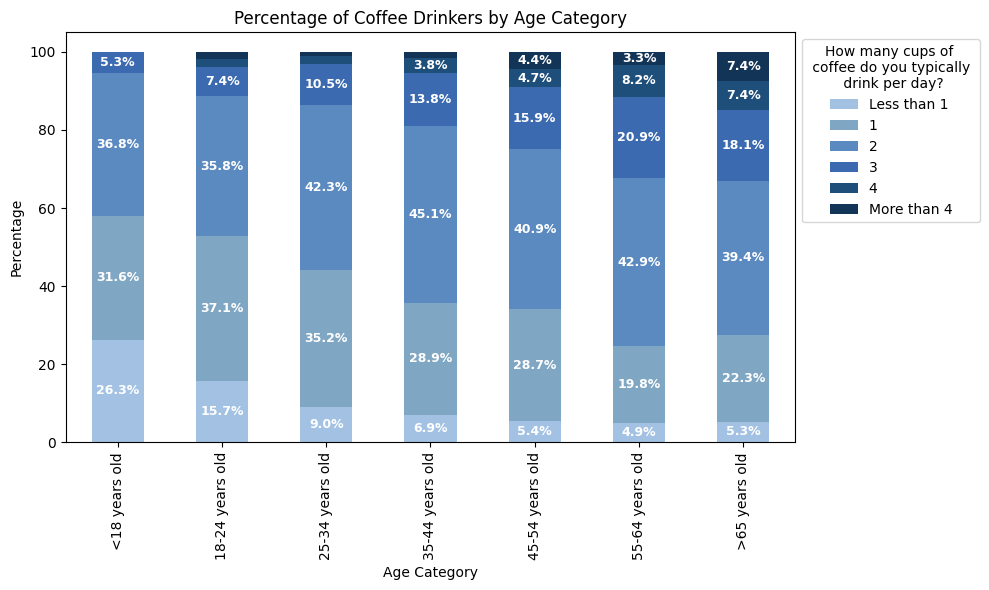

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars
df_age_no_coffee_pct.plot(kind='bar', stacked=True, ax=ax, color=['#a3c2e3', '#7fa6c2', '#5a8abf', '#3b6ab0', '#1e4e7a', '#123456'])
# Adding labels and title
ax.set_xlabel('Age Category')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Coffee Drinkers by Age Category')
legend = ax.legend(title='How many cups of \n coffee do you typically \n drink per day?', bbox_to_anchor=(1, 1), loc='upper left')
legend.get_title().set_ha('center')

for i, (age, row) in enumerate(df_age_no_coffee_pct.iterrows()):
    bottom = 0
    for col in df_age_no_coffee_pct.columns:
        height = row[col]
        if height > 3:
            ax.text(i, bottom + height / 2, f'{height}%', 
                    ha='center', va='center', fontsize=9, color='white', 
                    weight='bold')
            bottom += height

# Display the plot
plt.tight_layout()
plt.show()

Across all age categories, the majority of individuals consume approximately 2-3 cups of coffee per day. Notably, the data indicates a higher proportion of individuals in older age groups who report drinking 3 or more cups daily compared to their younger counterparts. It is noteworthy that the under-18 age group exhibits the highest proportion of individuals who report drinking zero cups of coffee per day. This finding aligns with expectations, given the generally lower coffee consumption rates observed in younger populations.

In [11]:
age_no_coffee['How many cups of coffee do you typically drink per day?'].unique()

['Less than 1', '1', '2', '3', '4', 'More than 4']
Categories (6, object): ['Less than 1' < '1' < '2' < '3' < '4' < 'More than 4']

In [12]:
cups_mapping = {
    'Less than 1': 0.5,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'More than 4': 5
}

age_no_coffee['number of cups numerical'] = age_no_coffee['How many cups of coffee do you typically drink per day?'].map(cups_mapping)
age_no_coffee['number of cups numerical'] = age_no_coffee['number of cups numerical'].astype(float)

In [13]:
avg_cups_per_age = round(age_no_coffee.groupby('What is your age?')['number of cups numerical'].mean(),1)

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\3910753134.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cups_per_age = round(age_no_coffee.groupby('What is your age?')['number of cups numerical'].mean(),1)


In [14]:
avg_cups_per_age

What is your age?
<18 years old      1.3
18-24 years old    1.6
25-34 years old    1.7
35-44 years old    1.9
45-54 years old    2.0
55-64 years old    2.2
>65 years old      2.2
Name: number of cups numerical, dtype: float64

In [15]:
# Right now the index is the age group, we want to turn this back into a regular column so we can have a regular df to plot.
avg_cups_per_age_df = avg_cups_per_age.reset_index()
avg_cups_per_age_df

,What is your age?,number of cups numerical
0,<18 years old,1.3
1,18-24 years old,1.6
2,25-34 years old,1.7
3,35-44 years old,1.9
4,45-54 years old,2.0
5,55-64 years old,2.2
6,>65 years old,2.2


The average values indicate that there is a positive correlation between the age and the average number of coffee consumed per day.

## Finding out the most popular places for people to typically drink coffee

In [16]:
place_drink_coffee = coffee_df[
    ['Submission ID',
    'Where do you typically drink coffee? (At home)',
    'Where do you typically drink coffee? (At the office)',
    'Where do you typically drink coffee? (On the go)',
    'Where do you typically drink coffee? (At a cafe)',
    'Where do you typically drink coffee? (None of these)']]

place_drink_coffee = place_drink_coffee.dropna()
place_drink_coffee

,Submission ID,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),Where do you typically drink coffee? (At a cafe),Where do you typically drink coffee? (None of these)
6,V0Gaxg,True,True,True,True,False
8,LbWda2,False,False,False,True,False
11,xpa2K9,False,False,False,False,False
12,V00RoJ,False,False,False,False,False
13,7WWB4A,True,True,True,True,False
...,...,...,...,...,...,...
4037,PA44VP,True,False,False,False,False
4038,vNgpPD,True,False,False,False,False
4039,g5ggRM,True,True,True,True,False
4040,rlgbDN,True,False,False,False,False


In [17]:
prefix_to_remove = 'Where do you typically drink coffee? '
place_drink_coffee.columns = place_drink_coffee.columns.str.replace(prefix_to_remove, '', regex=False)
# \ is the escape key. | means 'or'. So we are trying to remove '(' or ')'.
place_drink_coffee.columns = place_drink_coffee.columns.str.replace(r'\(|\)', '', regex=True).str.strip()

place_drink_coffee

,Submission ID,At home,At the office,On the go,At a cafe,None of these
6,V0Gaxg,True,True,True,True,False
8,LbWda2,False,False,False,True,False
11,xpa2K9,False,False,False,False,False
12,V00RoJ,False,False,False,False,False
13,7WWB4A,True,True,True,True,False
...,...,...,...,...,...,...
4037,PA44VP,True,False,False,False,False
4038,vNgpPD,True,False,False,False,False
4039,g5ggRM,True,True,True,True,False
4040,rlgbDN,True,False,False,False,False


In [18]:
place_drink_coffee_melt = place_drink_coffee.melt(id_vars='Submission ID',var_name='Where do you typically drink coffee?')

In [19]:
place_drink_coffee_melt = place_drink_coffee_melt[place_drink_coffee_melt['value']==True]
place_drink_coffee_melt = place_drink_coffee_melt.drop(columns='value')
place_drink_coffee_melt

,Submission ID,Where do you typically drink coffee?
0,V0Gaxg,At home
4,7WWB4A,At home
6,Zd694B,At home
8,QA5JYA,At home
11,eB7QoJ,At home
...,...,...
19508,jBGkaJ,None of these
19541,KM8Nkg,None of these
19759,lNMvqk,None of these
19840,DVWzjb,None of these


In [20]:
place_pct = round(place_drink_coffee_melt['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1).reset_index()
place_pct

,Where do you typically drink coffee?,proportion
0,At home,52.2
1,At the office,20.5
2,At a cafe,16.8
3,On the go,10.1
4,None of these,0.5


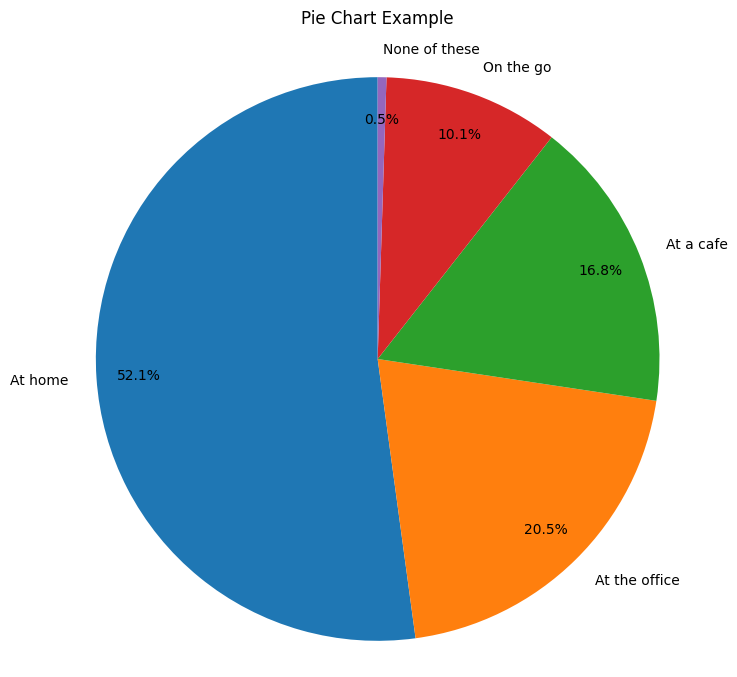

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(place_pct['proportion'], 
       labels=place_pct['Where do you typically drink coffee?'], 
       autopct='%1.1f%%', 
       startangle=90,
       pctdistance=0.85,  # Distance of the percentage labels from the center
        labeldistance=1.1)  # Distance of the category labels from the center

# Adding title

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

ax.set_title('Pie Chart Example', pad = 20)

# Display the plot
plt.show()

The pie chart indicates that more than half of the survey respondents drink coffee at home. Around 20% drink coffee in the office. The least popular choice for drinking coffee is on the go (just 10.1%).

## Finding the relationship between age and where people generally drink coffee

In [22]:
place_drink_coffee_melt

,Submission ID,Where do you typically drink coffee?
0,V0Gaxg,At home
4,7WWB4A,At home
6,Zd694B,At home
8,QA5JYA,At home
11,eB7QoJ,At home
...,...,...
19508,jBGkaJ,None of these
19541,KM8Nkg,None of these
19759,lNMvqk,None of these
19840,DVWzjb,None of these


In [23]:
coffee_df_age = coffee_df[['Submission ID', 'What is your age?']]

In [24]:
place_drink_coffee_age = place_drink_coffee_melt.merge(coffee_df_age,on='Submission ID')

In [25]:
place_drink_coffee_age.sort_values('Submission ID')

,Submission ID,Where do you typically drink coffee?,What is your age?
3384,0E11K6,At home,>65 years old
3390,0E1D5Z,At home,25-34 years old
4976,0E1D5Z,At the office,25-34 years old
3427,0E1qKB,At home,25-34 years old
3358,0E1vgN,At home,45-54 years old
...,...,...,...
6722,zKWjyE,At a cafe,25-34 years old
2947,zKWxaE,At home,55-64 years old
3080,zKWy91,At home,25-34 years old
4842,zKWy91,At the office,25-34 years old


In [26]:
place_age_pct = round(place_drink_coffee_age.groupby('What is your age?')['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1)

C:\Users\44771\AppData\Local\Temp\ipykernel_39948\2484322222.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  place_age_pct = round(place_drink_coffee_age.groupby('What is your age?')['Where do you typically drink coffee?'].value_counts(normalize=True)*100,1)


In [27]:
place_age_pct_df = place_age_pct.unstack()
place_age_pct_df

Where do you typically drink coffee?,At a cafe,At home,At the office,None of these,On the go
What is your age?,,,,,
<18 years old,20.0,50.0,10.0,0.0,20.0
18-24 years old,22.4,47.5,18.6,1.0,10.6
25-34 years old,18.0,49.8,21.4,0.6,10.2
35-44 years old,15.0,53.1,21.1,0.2,10.6
45-54 years old,10.9,62.5,17.3,0.2,9.1
55-64 years old,5.8,66.9,20.4,0.0,6.9
>65 years old,8.8,72.6,11.5,1.8,5.3


<Axes: xlabel='Where do you typically drink coffee?', ylabel='What is your age?'>

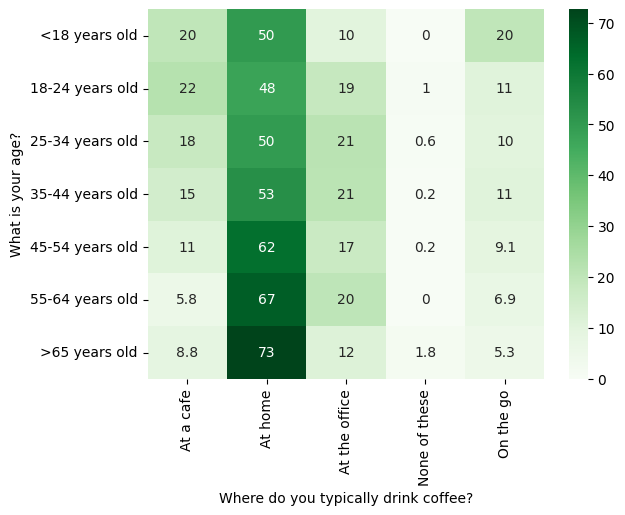

In [30]:
import seaborn as sns

sns.heatmap(place_age_pct_df, annot=True, cmap='Greens')


In [34]:
age_place_pct = round(place_drink_coffee_age.groupby('Where do you typically drink coffee?')['What is your age?'].value_counts(normalize=True)*100,1)
age_place_pct_df = age_place_pct.unstack()

In [35]:
age_place_pct_df

What is your age?,<18 years old,18-24 years old,25-34 years old,35-44 years old,45-54 years old,55-64 years old,>65 years old
Where do you typically drink coffee?,,,,,,,
At a cafe,0.7,15.8,55.6,21.6,4.2,1.3,0.9
At home,0.6,10.8,49.4,24.5,7.8,4.8,2.3
At the office,0.3,10.7,54.1,24.8,5.5,3.7,0.9
None of these,0.0,22.2,61.1,8.3,2.8,0.0,5.6
On the go,1.1,12.4,52.0,25.3,5.8,2.6,0.9


<Axes: xlabel='What is your age?', ylabel='Where do you typically drink coffee?'>

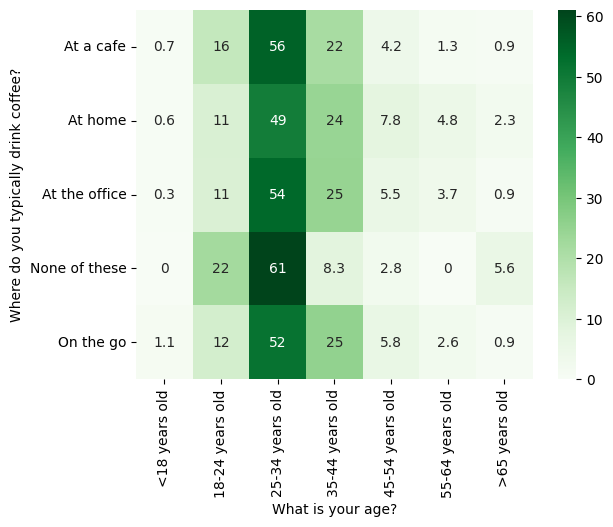

In [36]:
sns.heatmap(age_place_pct_df, annot=True, cmap='Greens')